# Examples of optimizing a six hump

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform
import math

In [2]:
param_dict = {
        'x': uniform(-3, 3),
        'y': uniform(-2, 2),
    }


x_opt = 0.0898 # or -0.0898
y_opt = -0.7126  # or 0.7126

In [3]:
def camel(x,y):
        x2 = math.pow(x,2)
        x4 = math.pow(x,4)
        y2 = math.pow(y,2)
        return (4.0 - 2.1 * x2 + (x4 / 3.0)) * x2 + x*y + (-4.0 + 4.0 * y2) * y2

In [4]:
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        y = hyper_par['y']
        result = - camel(x, y)
        results.append(result)
    return results

In [5]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = 40
conf_Dict['domain_size'] = 10000

In [6]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
results = tuner.run()

In [7]:
print('best parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best parameters: {'x': -0.0027369310473797093, 'y': -0.46492934688872944}
best objective: 0.676435380027886


In [8]:
print("Real x_opt and y_opt are:",x_opt,y_opt)
print("optimal objective:",-camel(x_opt,y_opt))

Real x_opt and y_opt are: 0.0898 -0.7126
optimal objective: 1.0316284229280819


# Plotting the actual variation in objective values of the tried results

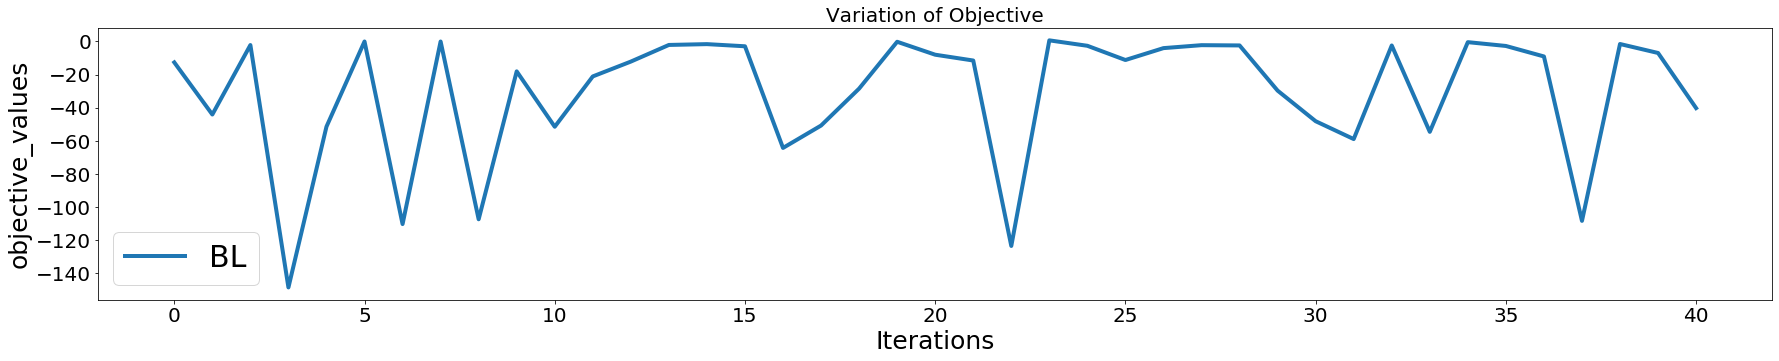

In [10]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

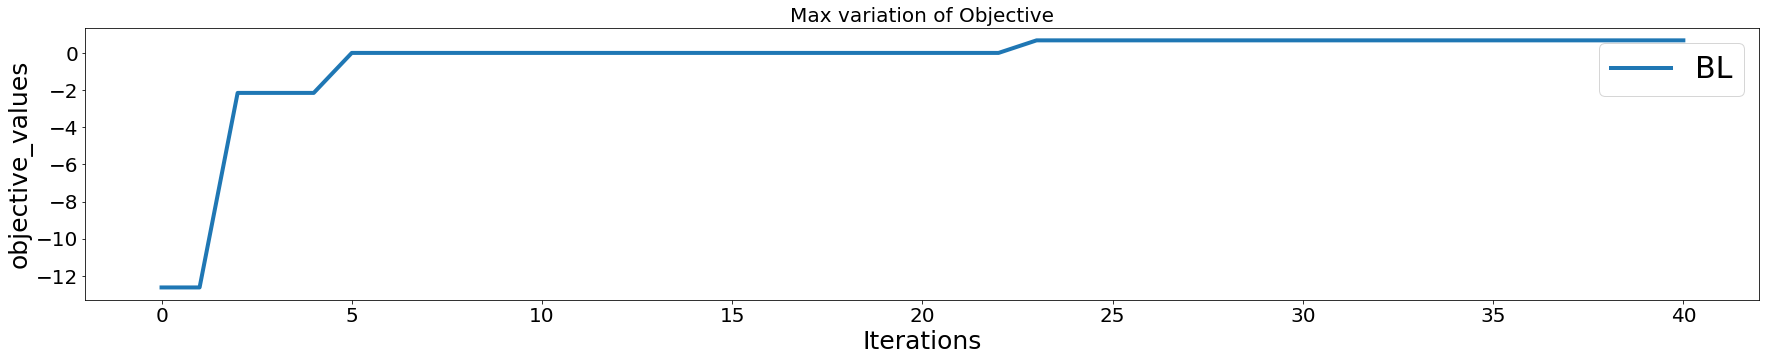

In [11]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()